In [1]:
from Generation import scenarios_regression
import cvxpy as cp
from utils import solver_cvx, plot_surface, eval_loss, grad_SOM
import numpy as np
import matplotlib.pyplot as plt

[1.66117079 0.89442469] [1.66108699 0.89428584]


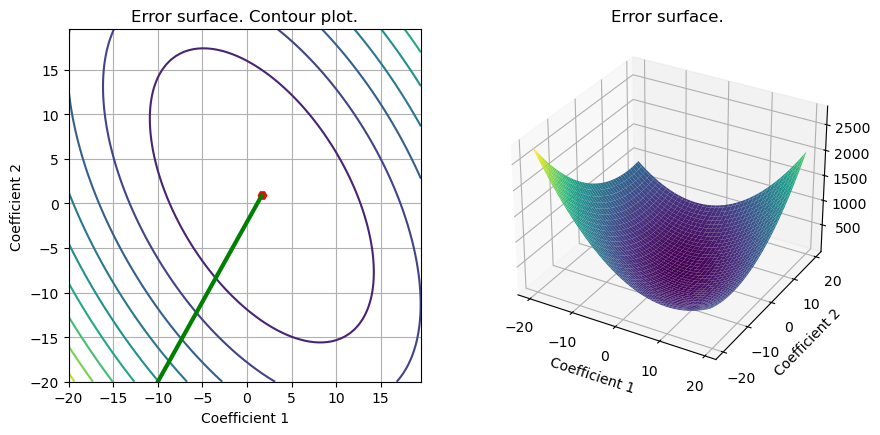

In [2]:
# Loading scenarios
# ===========================
scenario=1;
data_reg, set_up=scenarios_regression(scenario);

# Definition of the problem
#===================================
loss_fn = lambda n, X, Y, w: (1/n)*cp.pnorm(X @ w - Y, p=2)**2
reg_L2 = lambda w: cp.pnorm(w, p=2)**2

loss_LS_L2 = lambda n, X, Y, w, lambd: loss_fn(n, X, Y, w) + (lambd/2) * reg_L2(w)
grad_LS_L2 = lambda n, X, Y, w, lambd: (2/n)*X.T@(X @ w - Y) + lambd * w
Hess_LS_L2 = lambda n, X, Y, w, lambd: (2/n)*X.T@X + lambd * np.eye(X.shape[1])

#=========================================
# Solution of the empirical risk using CVX
w_L2_cvx=solver_cvx(set_up,loss_LS_L2);
Xtrain = set_up['Xtrain'][:,:set_up['d']+1]
w_opt=np.linalg.inv(2/set_up['Niter_train']*Xtrain.T@Xtrain + set_up['Lambda']*np.eye(set_up['d']+1))@((2/set_up['Niter_train'])*Xtrain.T)@set_up['ytrain'][:,0];
print(w_L2_cvx, w_opt)

# Newton algorithm
out_hess =grad_SOM(set_up,grad_LS_L2,Hess_LS_L2);

# We plot the surface
S = plot_surface(set_up,loss_LS_L2,w_L2_cvx,include_grad=True, grad=out_hess);

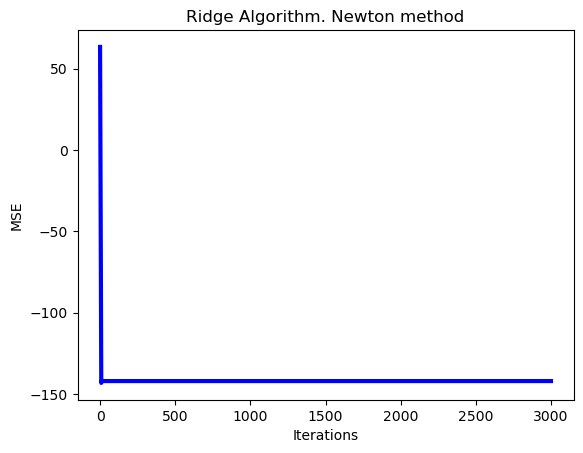

In [5]:
#We plot the error power as a learning curve
w = cp.Variable(x_L2_cvx.shape[0])
w.value = x_L2_cvx
loss_opt=loss_LS_L2(set_up['Niter_train'],set_up['Xtrain'][:,0:set_up['d']+1],set_up['ytrain'][:,0],w_L2_cvx,set_up['Lambda']).value
loss_hess=eval_loss(out_hess,set_up,loss_LS_L2);

plt.plot(np.arange(0,set_up['Niter_train']),10*np.log10(np.sum((loss_hess-loss_opt*np.ones((1,set_up['Niter_train'])))**2,axis=0)),color='b', linewidth = 3)
plt.grid
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Ridge Algorithm. Newton method')
plt.show()
